In [88]:
# Task - 3  Customer Segmentation / Clustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [89]:
# Loading datasets for all task
customers = pd.read_csv('/content/Customers.csv')
# products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [90]:
clustering_features = customer_features.drop('CustomerID', axis=1)
clustering_features_scaled = scaler.fit_transform(clustering_features)

In [91]:
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features_scaled)
    db_index = davies_bouldin_score(clustering_features_scaled, kmeans.labels_)
    db_scores.append((k, db_index))

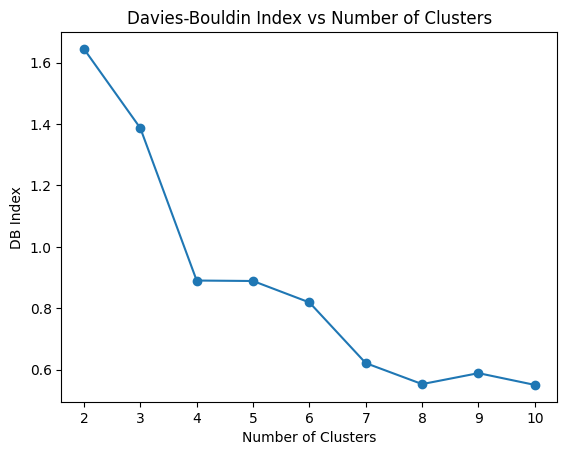

In [92]:
db_scores_df = pd.DataFrame(db_scores, columns=['Clusters', 'DB Index'])
plt.plot(db_scores_df['Clusters'], db_scores_df['DB Index'], marker='o')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()

In [93]:
optimal_clusters = db_scores_df.loc[db_scores_df['DB Index'].idxmin(), 'Clusters']
kmeans = KMeans(n_clusters=int(optimal_clusters), random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(clustering_features_scaled)

In [94]:
customer_features[['CustomerID', 'Cluster']].to_csv('/mnt/data/Customer_Segmentation.csv', index=False) # Changes this CSV file into PDF manually